In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
url = r'https://docs.google.com/spreadsheets/d/e/2PACX-1vTz36fDTfPTinXS69gP4dXBpc-dh4yfMs6DBgNWl3AD5o7TR1FmDwzDhrvv424LL_LgW9riKFiPBsHi/pub?output=csv'

In [80]:
df = pd.read_csv(url)
df.head()

,"name,country,subscribers,1"
0,"SEUNGRISEYO,Japan,8325402,217000"
1,"6PRI1,France,5203348,279000"
2,"YUUUKIIINAAA,Japan,4867219,100000"
3,"PIMTHA,Japan,3286925,81500"
4,"BECKYLYNCHWWE,UK,3095191,94000"


In [81]:
rows = []
for i in range(df.shape[0]):
    rows.append(df.iloc[i].str.split(',', expand=True))

In [82]:
df = pd.DataFrame(pd.concat(rows).values)
df.columns = ['instagram_id', 'country', 'followers', 'avg_likes']
df['followers'] = pd.to_numeric(df['followers'], errors='coerce')
df['avg_likes'] = pd.to_numeric(df['avg_likes'], errors='coerce')

In [83]:
df.head()

,instagram_id,country,followers,avg_likes
0,SEUNGRISEYO,Japan,8325402,217000
1,6PRI1,France,5203348,279000
2,YUUUKIIINAAA,Japan,4867219,100000
3,PIMTHA,Japan,3286925,81500
4,BECKYLYNCHWWE,UK,3095191,94000


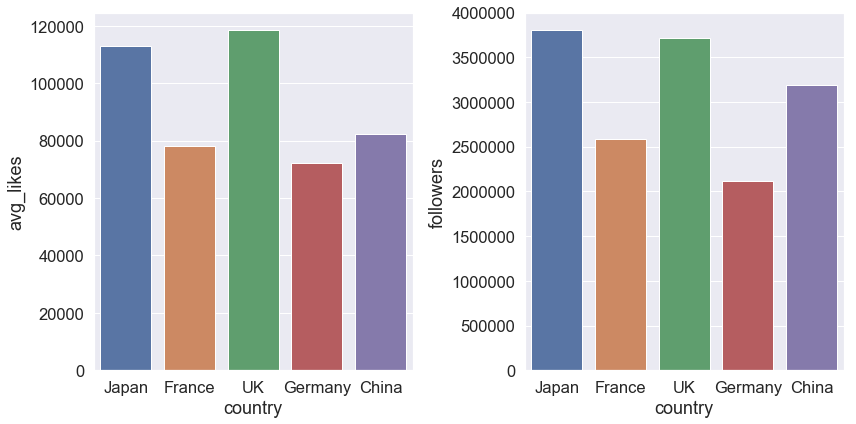

In [85]:
fig, axes = plt.subplots(nrows=1, ncols= 2, figsize = (12,6))
for i,y in zip([1,2], ['avg_likes', 'followers']):
    plt.subplot(1, 2, i)
    ax = sns.barplot(x='country', y=y, data=df, ci=None)
plt.tight_layout()

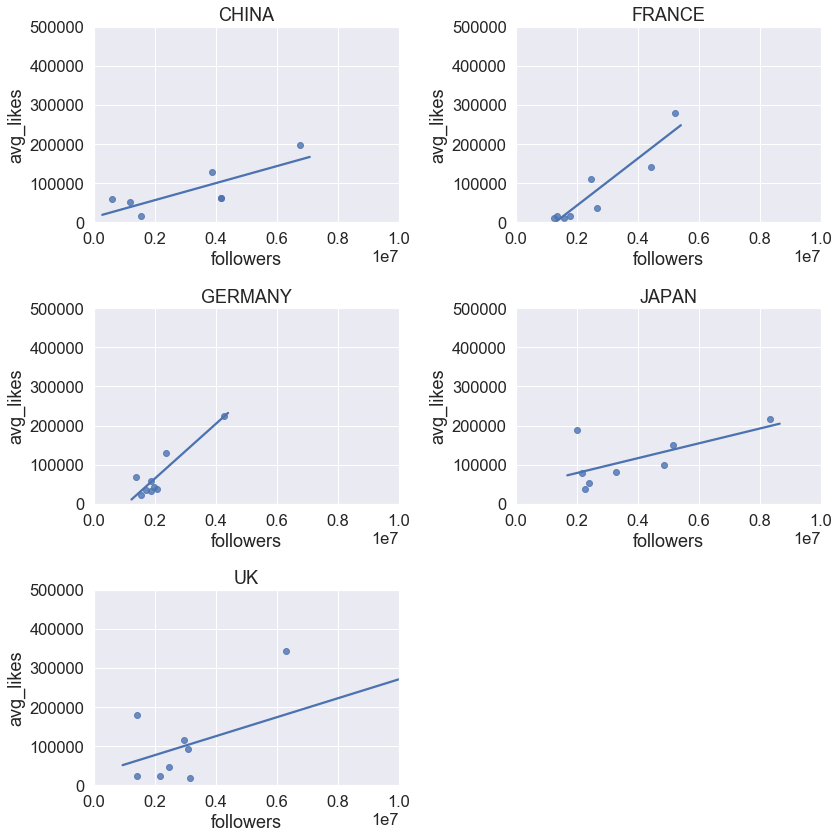

In [86]:
fig, axes = plt.subplots(figsize = (12,12))

xlim = 10000000
ylim = 500000
sns.set(font_scale=1.5)

for i,country in zip(np.arange(1,7), np.unique(df['country'])):
    plt.subplot(3, 2, i)
    ax = sns.regplot(x='followers', y='avg_likes', data=df[df['country']==country], ci=None)
    ax.set_title(country.upper())
    axes = ax.axes
    axes.set_ylim(0,ylim)
    axes.set_xlim(0,xlim)
plt.tight_layout()